<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [17]:
import seaborn as sns

In [5]:
df = pd.read_csv ("smite_items.csv")

In [6]:
df.shape

(261, 7)

In [15]:
df.keys()

Index(['Item', 'Item_Type', 'Item_Tier', 'Cost', 'Total_Cost', 'Stats',
       'Passive_Effect'],
      dtype='object')

In [7]:
#this is really hard to read!!!
print (df.head())

              Item                               Item_Type Item_Tier   Cost  \
0  Sentinel's Gift             Starter, Defensive, Utility    Tier 1  550.0   
1      Benevolence             Starter, Defensive, Utility    Tier 1  600.0   
2   Bumba's Dagger             Starter, Defensive, Utility    Tier 1  600.0   
3    Tainted Steel           Starter, Offensive, Defensive    Tier 1  600.0   
4         War Flag  Starter, Offensive, Defensive, Utility    Tier 1  600.0   

   Total_Cost                                              Stats  \
0         NaN  +10 Physical Protection +10 Magical Protection...   
1         NaN                         +75 Health +10 MP5 +10 HP5   
2         NaN  +13 Physical Power +25 Magical Power +50 Healt...   
3         NaN  +15 Physical Power +25 Magical Power +15 Physi...   
4         NaN  +10 Physical Protection +10 Magical Protection...   

                                      Passive_Effect  
0  Getting the assist for an enemy minion or jung...  
1  Whi

In [11]:
# Remove truncation and see the 7 columns in 1 line 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from IPython.display import display
display(df.head(50))
display(df.tail(50))

,Item,Item_Type,Item_Tier,Cost,Total_Cost,Stats,Passive_Effect
0,Sentinel's Gift,"Starter, Defensive, Utility",Tier 1,550.0,NaN,+10 Physical Protection +10 Magical Protection +75 Health +7 MP5,Getting the assist for an enemy minion or jungle monster dying will provide 8 Bonus gold and restore 12 Health and 8 Mana. If you are not within 30 units of an allied god for 20 seconds this passive is disabled until you are near an allied god again. Can be upgraded at level 15.
1,Benevolence,"Starter, Defensive, Utility",Tier 1,600.0,NaN,+75 Health +10 MP5 +10 HP5,"While not near an ally god you gain 1 stack of Benevolence every second, up to a maximum of 50. Assists provide 4 stacks. While within 70 units of a hurt ally god you use up to 5 stacks a second to heal them and yourself for 0.6% of your Maximum Health. Each stack consumed provides you with 1 gold. If you overcap stacks they will still provide gold as long as you are near an ally god. Can be upgraded at level 15."
2,Bumba's Dagger,"Starter, Defensive, Utility",Tier 1,600.0,NaN,+13 Physical Power +25 Magical Power +50 Health +50 Mana,Your Basic Attacks deal +25 True Damage and your Abilities deal +35% Damage versus Jungle Monsters. When a Jungle Monster is killed you are restored for 10% of the Monster's Health and 25 Mana. Can be upgraded at level 20.
3,Tainted Steel,"Starter, Offensive, Defensive",Tier 1,600.0,NaN,+15 Physical Power +25 Magical Power +15 Physical Protection +15 Magical Protection,Enemy Gods that you hit have their healing taken reduced by 20% for 5s. You are healed for 120% of the healing reduced. Can be upgraded at level 20.
4,War Flag,"Starter, Offensive, Defensive, Utility",Tier 1,600.0,NaN,+10 Physical Protection +10 Magical Protection +100 Health +10 MP5,Getting the assist for an enemy minion or jungle monster dying will provide 8 Bonus gold and restore 8 Health and 5 Mana. You and nearby allied gods also receive a stack that gives 1% Movement Speed and 2% Attack Speed for 10s to nearby allies up to 10 stacks. Can be upgraded at level 15.
5,Bluestone Pendant,"Starter, Offensive, Defensive, Utility",Tier 1,650.0,NaN,+15 Physical Power +15 HP5 +10 MP5,Enemies hit by your damaging Abilities take an additional 40 Physical Damage over 2s. Subsequent hits on the same target do half the bonus damage for the next 3s. Can be upgraded at level 20.
6,Death's Toll,"Starter, Offensive, Defensive",Tier 1,650.0,NaN,+18 Physical Power +35 Magical Power +75 Health,"Hitting an enemy with a Basic Attack restores 2 Health (+0.3% of your Maximum Health) and 1 Mana (+1% of your Maximum Mana). Basic Attacks that deal damage in an AoE restore less health (75% for Melee Attacks, 50% for Ranged Attacks) for each enemy hit after the first. Can be upgraded at level 20."
7,Eye of the Jungle,"Starter, Offensive, Defensive",Tier 1,650.0,NaN,+15 Physical Power +30 Magical Power +7 Physical Protection +10 HP5,You deal 30% increased damage to Jungle Monsters. Upon defeating a Large Jungle Monster you place a ward at its location that lasts for 30 seconds. While in the jungle you gain +20 HP5 and +15 MP5 Can be upgraded at level 20.
8,Fighter's Mask,"Starter, Offensive, Defensive, Utility",Tier 1,650.0,NaN,+10 Physical Power +15 Magical Power +10 HP5 +10 MP5,Increase Damage Dealt by 5% + 0.25% per your god’s level. Increase Damage Taken by 6% + 0.1% per your god’s level. This item grants 2 MP5 per 10% of your missing Mana. Your abilities deal +10 Bonus Ability True Damage to minions. Can be upgraded at level 20.
9,Gilded Arrow,"Starter, Offensive, Defensive, Utility",Tier 1,650.0,NaN,+20 Basic Attack Damage +50 Health +7 MP5,"Every 10s the highest health enemy minion or jungle monster within 80 units of you is marked. If you secure the killing blow on that target you gain 4 bonus gold and 25% attack speed for 8s, and restore 30 Mana. Can be upgraded at level 20."


,Item,Item_Type,Item_Tier,Cost,Total_Cost,Stats,Passive_Effect
211,Silverbranch Bow,Offensive,Tier 3,1350.0,2550.0,+25 Physical Power +30% Attack Speed +10% Physical Penetration,"For each 0.02 Attack Speed you go over 2.5 Attack Speed, you gain 3 Physical Power. You can not gain more than 120 Physical Power in this way."
212,Staff of Myrddin,"Offensive, Utility",Tier 3,950.0,2550.0,+75 Magical Power +10% Magical Penetration +10% Cooldown Reduction,When your ultimate ability has finished casting you gain Myrddin's Rage which provides 20% Increased Damage Dealt decaying over 8s. At the end of the 8s you lose Myrddin's Rage. This can only occur once every 45s.
213,Tablet of Destinies,"Offensive, Defensive, Utility",Tier 3,1200.0,2550.0,+65 Magical Power +100 Health +300 Mana,"Your next successful damaging ability on an enemy god grants a stack of Wisdom. For each stack of Wisdom you have, your abilities deal 0.1% of your Max Mana as True Damage to enemy gods. You may only gain one stack and deal damage every 2s, and can only gain stacks once per god per ability hit. Max 50 stacks."
214,Arondight,"Offensive, Utility",Tier 3,900.0,2500.0,+50 Physical Power +10% Cooldown Reduction +7% Movement Speed,"When your Ultimate ability has finished casting, reveal all enemy gods within 120 units for 10s. While moving towards revealed enemies gain 20% Movement Speed. When first striking a revealed target they take an additional 30 + 50% of your Physical Power. This can only occur once every 45 seconds. This item is only available to Assassins and Warriors."
215,Bloodforge,"Offensive, Utility",Tier 3,1200.0,2600.0,+50 Physical Power +15% Physical Lifesteal +7% Movement Speed,Killing an enemy god forges a shield from their blood with Health equal to 200 + 10 per Player Level for 20s. While the Blood Shield is active you gain +10% Movement Speed.
216,Chronos' Pendant,"Offensive, Utility",Tier 3,1200.0,2600.0,+70 Magical Power +20 MP5 +20% Cooldown Reduction,"Every 10s the Pendant activates, subtracting 1s from all of your abilities currently on Cooldown. The initial countdown will not start until you leave the fountain."
217,Cyclopean Ring,"Offensive, Utility",Tier 3,1300.0,2600.0,+60 Magical Power +25% Attack Speed +10% Cooldown Reduction,"Your next basic attack against an enemy god deals bonus Magical Damage equal to 8% of the target's maximum Health. This effect can only occur once every 10s, reduced by 2s for each successful Basic Attack on an enemy god."
218,Ethereal Staff,"Offensive, Defensive",Tier 3,1250.0,2600.0,+70 Magical Power +150 Health +20% Crowd Control Reduction,Whenever you damage an enemy god with an ability you steal 8% maximum mana as well as 6% maximum health from the target. The Stats remain stolen for 45s and targets affected can have multiple Buffs and Debuffs at once. This can only occur once every 15 seconds.
219,Hastened Ring,"Offensive, Utility",Tier 3,1300.0,2600.0,+55 Magical Power +25% Attack Speed +7% Movement Speed,"Hitting an enemy God with a Basic Attack grants Haste for 6s, causing you to be immune from Basic Attack Movement Penalty. (Internal Cooldown 25s)"
220,Qin's Sais,Offensive,Tier 3,1350.0,2600.0,+30 Physical Power +25% Attack Speed,"On Basic Attack hits, deal Physical Damage equal to 1.5% of the target's maximum Health. If the target has over 2250 Health, the bonus damage scales up. This effect reaches a maximum of 6% of the targets Maximum Health at 2750 Health."


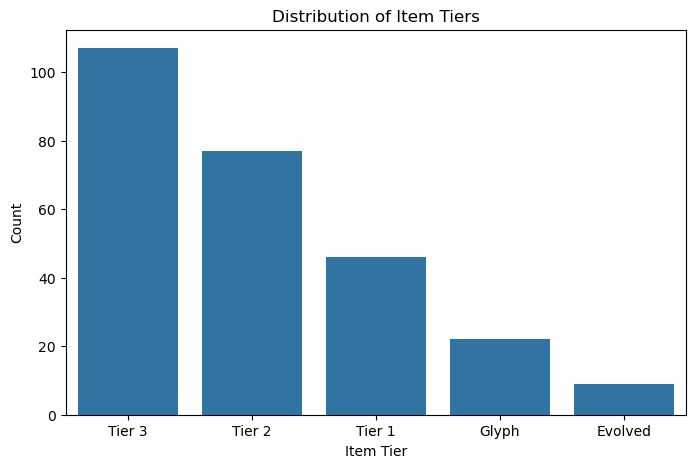

In [19]:
# Plot the distribution of item tiers
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Item_Tier', order=df['Item_Tier'].value_counts().index)
plt.title('Distribution of Item Tiers')
plt.xlabel('Item Tier')
plt.ylabel('Count')
plt.show()

Evolved items have no cost as they "evolve" from a tier 3 item by completing a task in game i.e do x damage to enemy gods once the tier 3 is purchased

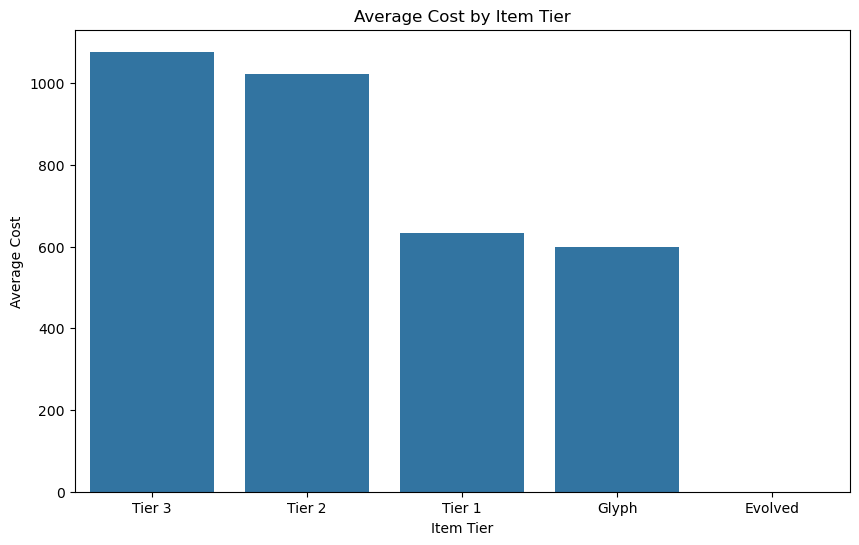

In [21]:
# Barplot of Average Cost by Item Tier
plt.figure(figsize=(10, 6))
average_cost_by_tier = df.groupby('Item_Tier')['Cost'].mean().sort_values(ascending=False)
sns.barplot(x=average_cost_by_tier.index, y=average_cost_by_tier.values)
plt.title('Average Cost by Item Tier')
plt.xlabel('Item Tier')
plt.ylabel('Average Cost')
plt.show()